### Dependencies

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats 

In [2]:
pd.set_option('display.max_columns', None)

### Importing Dataset

In [3]:
df = pd.read_csv('./march_master.csv')

In [4]:
df.shape

(209222, 49)

In [5]:
df = df.drop_duplicates(['project_id'], keep='first')

In [6]:
df.shape

(182264, 49)

In [7]:
df.head(1)

,backers_count,blurb,converted_pledged_amount,country,created_at,currency,currency_symbol,currency_trailing_code,current_currency,deadline,disable_communication,fx_rate,goal,id,is_starrable,launched_at,name,pledged,slug,source_url,spotlight,staff_pick,state,state_changed_at,static_usd_rate,usd_pledged,usd_type,cat_id,cat_name,cat_slug,cat_position,cat_parent_id,cat_color,loc_id,loc_name,loc_slug,loc_short_name,loc_display_name,loc_local_name,loc_country,loc_state,loc_type,loc_is_root,creator_id,creator_name,creator_slug,profile_id,project_id,url
0,21,2006 was almost 7 years ago.... Can you believ...,802,US,2013-12-21 21:01:30,USD,$,True,USD,2014-02-08 22:37:26,False,1.0,200.0,287514992,False,2013-12-25 22:37:26,New Final Round Album,802.0,new-final-round-album,https://www.kickstarter.com/discover/categorie...,True,False,successful,1391899046,1.0,802.0,international,43,Rock,music/rock,17,14.0,10878931,2379574.0,Chicago,chicago-il,Chicago,Chicago,Chicago,US,IL,Town,False,1495925645,Daniel,NaN,822687,822687,https://www.kickstarter.com/projects/149592564...


In [8]:
df.columns.tolist()

['backers_count',
 'blurb',
 'converted_pledged_amount',
 'country',
 'created_at',
 'currency',
 'currency_symbol',
 'currency_trailing_code',
 'current_currency',
 'deadline',
 'disable_communication',
 'fx_rate',
 'goal',
 'id',
 'is_starrable',
 'launched_at',
 'name',
 'pledged',
 'slug',
 'source_url',
 'spotlight',
 'staff_pick',
 'state',
 'state_changed_at',
 'static_usd_rate',
 'usd_pledged',
 'usd_type',
 'cat_id',
 'cat_name',
 'cat_slug',
 'cat_position',
 'cat_parent_id',
 'cat_color',
 'loc_id',
 'loc_name',
 'loc_slug',
 'loc_short_name',
 'loc_display_name',
 'loc_local_name',
 'loc_country',
 'loc_state',
 'loc_type',
 'loc_is_root',
 'creator_id',
 'creator_name',
 'creator_slug',
 'profile_id',
 'project_id',
 'url']

In [9]:
df['project_id'].nunique()

182264

### What is the breakdown of successful and failed campaigns?

In [10]:
df['state'].isnull().sum()

0

In [11]:
df['state'].value_counts()

successful    94778
failed        74200
canceled       8624
live           4039
suspended       623
Name: state, dtype: int64

In [12]:
df['state'].value_counts(normalize=True)

successful    0.520004
failed        0.407102
canceled      0.047316
live          0.022160
suspended     0.003418
Name: state, dtype: float64

### What is the distribution across categories?
- Total
- Success/failure ratio within the categories 

In [13]:
df['cat_name'].isnull().sum()

0

In [14]:
df['cat_name'].nunique()

159

Note, Due to the scraping limits, we only get a count of 2400 projects in many categories this may limit the usefulness of this slice of the data. It may be preferential to look at the dataset with duplicates to get a better sense of the distribution across categories with duplicates. Alternatively, we could time bound the projects to get a better view of the distribution within a time shot. 

In [15]:
df['cat_name'].value_counts()

Web                 3815
Comedy              2762
Nonfiction          2401
Restaurants         2400
Drama               2400
Narrative Film      2400
Graphic Novels      2400
Comic Books         2400
Indie Rock          2400
Fiction             2400
Webseries           2400
Rock                2400
Hip-Hop             2400
Country & Folk      2400
Video Games         2400
Apps                2400
Gadgets             2400
Product Design      2400
Software            2400
Hardware            2400
Public Art          2400
Drinks              2400
Documentary         2400
Apparel             2400
Shorts              2400
Children's Books    2400
Mobile Games        2400
Playing Cards       2400
Pop                 2400
Illustration        2400
                    ... 
Puzzles              288
Animals              286
Stationery           281
Film & Video         276
Printing             275
Makerspaces          268
Design               253
Romance              230
Video Art            228


In [16]:
df['cat_id'].nunique()

169

In [17]:
pd.crosstab(df['state'], df['cat_name'], normalize='columns')

cat_name,3D Printing,Academic,Accessories,Action,Animals,Animation,Anthologies,Apparel,Apps,Architecture,Art,Art Books,Audio,Bacon,Blues,Calendars,Camera Equipment,Candles,Ceramics,Children's Books,Childrenswear,Chiptune,Civic Design,Classical Music,Comedy,Comic Books,Comics,Community Gardens,Conceptual Art,Cookbooks,Country & Folk,Couture,Crafts,Crochet,DIY,DIY Electronics,Dance,Design,Digital Art,Documentary,Drama,Drinks,Electronic Music,Embroidery,Events,Experimental,Fabrication Tools,Faith,Family,Fantasy,Farmer's Markets,Farms,Fashion,Festivals,Fiction,Film & Video,Fine Art,Flight,Food,Food Trucks,Footwear,Gadgets,Games,Gaming Hardware,Glass,Graphic Design,Graphic Novels,Hardware,Hip-Hop,Horror,Illustration,Immersive,Indie Rock,Installations,Interactive Design,Jazz,Jewelry,Journalism,Kids,Knitting,Latin,Letterpress,Literary Journals,Literary Spaces,Live Games,Makerspaces,Metal,Mixed Media,Mobile Games,Movie Theaters,Music,Music Videos,Musical,Narrative Film,Nature,Nonfiction,Painting,People,Performance Art,Performances,Periodicals,Pet Fashion,Photo,Photobooks,Photography,Places,Playing Cards,Plays,Poetry,Pop,Pottery,Print,Printing,Product Design,Public Art,Publishing,Punk,Puzzles,Quilts,R&B,Radio & Podcasts,Ready-to-wear,Residencies,Restaurants,Robots,Rock,Romance,Science Fiction,Sculpture,Shorts,Small Batch,Software,Sound,Space Exploration,Spaces,Stationery,Tabletop Games,Taxidermy,Technology,Television,Textiles,Theater,Thrillers,Translations,Typography,Vegan,Video,Video Art,Video Games,Wearables,Weaving,Web,Webcomics,Webseries,Woodworking,Workshops,World Music,Young Adult,Zines
state,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
canceled,0.129560,0.128913,0.000000,0.138012,0.083916,0.000000,0.049211,0.000000,0.000000,0.120510,0.000000,0.000000,0.097308,0.120000,0.094937,0.085995,0.111969,0.114943,0.081301,0.00000,0.139456,0.048780,0.058462,0.000000,0.070239,0.000000,0.000000,0.092357,0.086802,0.126183,0.000000,0.151899,0.000000,0.063158,0.091997,0.100917,0.000000,0.000000,0.122079,0.000000,0.027083,0.000000,0.115352,0.096296,0.101171,0.089319,0.111864,0.061798,0.114213,0.113527,0.077088,0.077752,0.000000,0.073607,0.000000,0.000000,0.095672,0.133929,0.000000,0.087154,0.125530,0.000000,0.000000,0.189493,0.101911,0.099130,0.045000,0.000000,0.00000,0.131030,0.000000,0.074074,0.000000,0.077966,0.135484,0.046328,0.128725,0.000000,0.087500,0.105023,0.073034,0.016949,0.080495,0.087912,0.130148,0.111940,0.076549,0.00000,0.000000,0.091667,0.000000,0.104113,0.081159,0.000000,0.109873,0.000000,0.000000,0.106678,0.076755,0.044194,0.086892,0.124224,0.109589,0.083949,0.000000,0.120497,0.000000,0.050891,0.081883,0.00000,0.063380,0.128571,0.167273,0.000000,0.000000,0.000000,0.126685,0.125000,0.077778,0.099448,0.076995,0.117759,0.024691,0.000000,0.118182,0.000000,0.113043,0.106818,0.078561,0.000000,0.085728,0.000000,0.140187,0.082192,0.095483,0.113879,0.00000,0.076923,0.00000,0.124240,0.090652,0.000000,0.126682,0.104396,0.058824,0.084724,0.084783,0.083333,0.000000,0.184354,0.083333,0.044037,0.060961,0.000000,0.076751,0.056180,0.069523,0.121086,0.059880
failed,0.477987,0.636280,0.156250,0.681871,0.643357,0.662083,0.246054,0.206667,0.778750,0.621089,0.000000,0.322083,0.602484,0.648889,0.433544,0.481572,0.372587,0.735632,0.463415,0.00000,0.653061,0.195122,0.578462,0.252083,0.498552,0.000000,0.000000,0.681529,0.544730,0.588328,0.000000,0.683544,0.000000,0.694737,0.719521,0.422018,0.000000,0.000000,0.560164,0.000000,0.542917,0.667083,0.548658,0.696296,0.667732,0.502762,0.603390,0.491172,0.672589,0.545894,0.743041,0.695150,0.000000,0.378549,0.000000,0.000000,0.511390,0.660714,0.000000,0.774811,0.519084,0.502917,0.000000,0.444653,0.624204,0.502174,0.332500,0.438333,0.72000,0.531943,0.015000,0.382716,0.000000,0.430508,0.658065,0.340069,0.572606,0.292072,0.446875,0.401826,0.640449,0.389831,0.439628,0.296703,0.651565,0.567164,0.490887,0.

### What is the distribution of the dataset across time? 

In [18]:
df['created_at'].min()

'2009-04-22 02:11:10'

In [19]:
df['created_at'].max()

'2019-03-14 01:25:26'

In [20]:
df['created_at'].dtype

dtype('O')

In [21]:
df['created_at'].astype

<bound method NDFrame.astype of 0         2013-12-21 21:01:30
1         2019-02-08 21:02:48
2         2016-10-23 17:06:24
3         2018-10-24 08:32:00
4         2015-03-07 05:35:17
5         2018-01-11 16:26:03
6         2018-08-10 19:02:46
7         2014-04-14 00:24:36
8         2012-07-23 16:29:15
9         2016-06-06 17:26:56
10        2014-11-03 22:44:33
11        2013-09-30 20:02:29
12        2018-05-12 21:12:38
13        2017-04-06 22:53:25
14        2016-04-26 08:56:26
15        2015-05-30 12:48:45
16        2015-03-13 01:12:58
17        2013-02-28 03:23:08
18        2016-05-27 22:44:29
19        2013-01-13 04:20:08
20        2013-09-22 21:50:00
21        2017-11-29 13:56:55
22        2014-02-17 17:31:02
23        2015-03-07 16:52:45
24        2019-01-12 20:05:31
25        2018-03-23 22:51:21
26        2018-06-11 17:59:26
27        2018-08-28 02:53:43
28        2016-07-13 22:59:39
29        2012-12-31 13:59:52
                 ...         
209184    2018-01-03 02:04:15
209185  

In [22]:
df['created_at'] = pd.to_datetime(df['created_at'])

In [23]:
labels = [2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019]
date_bins = pd.date_range('2008-01-01 23:59:59', freq='1Y', periods=12)
date_bins.astype

<bound method DatetimeIndexOpsMixin.astype of DatetimeIndex(['2008-12-31 23:59:59', '2009-12-31 23:59:59',
               '2010-12-31 23:59:59', '2011-12-31 23:59:59',
               '2012-12-31 23:59:59', '2013-12-31 23:59:59',
               '2014-12-31 23:59:59', '2015-12-31 23:59:59',
               '2016-12-31 23:59:59', '2017-12-31 23:59:59',
               '2018-12-31 23:59:59', '2019-12-31 23:59:59'],
              dtype='datetime64[ns]', freq='A-DEC')>

In [24]:
df['created_year'] = pd.cut(df['created_at'], date_bins, labels=labels)

In [25]:
df['created_year'].value_counts()

2015    36714
2014    29195
2018    28014
2016    27713
2017    27146
2013    12310
2012     9879
2019     4925
2011     4583
2010     1522
2009      263
Name: created_year, dtype: int64

In [26]:
pd.crosstab(df['created_year'], df['cat_name'])

cat_name,3D Printing,Academic,Accessories,Action,Animals,Animation,Anthologies,Apparel,Apps,Architecture,Art,Art Books,Audio,Bacon,Blues,Calendars,Camera Equipment,Candles,Ceramics,Children's Books,Childrenswear,Chiptune,Civic Design,Classical Music,Comedy,Comic Books,Comics,Community Gardens,Conceptual Art,Cookbooks,Country & Folk,Couture,Crafts,Crochet,DIY,DIY Electronics,Dance,Design,Digital Art,Documentary,Drama,Drinks,Electronic Music,Embroidery,Events,Experimental,Fabrication Tools,Faith,Family,Fantasy,Farmer's Markets,Farms,Fashion,Festivals,Fiction,Film & Video,Fine Art,Flight,Food,Food Trucks,Footwear,Gadgets,Games,Gaming Hardware,Glass,Graphic Design,Graphic Novels,Hardware,Hip-Hop,Horror,Illustration,Immersive,Indie Rock,Installations,Interactive Design,Jazz,Jewelry,Journalism,Kids,Knitting,Latin,Letterpress,Literary Journals,Literary Spaces,Live Games,Makerspaces,Metal,Mixed Media,Mobile Games,Movie Theaters,Music,Music Videos,Musical,Narrative Film,Nature,Nonfiction,Painting,People,Performance Art,Performances,Periodicals,Pet Fashion,Photo,Photobooks,Photography,Places,Playing Cards,Plays,Poetry,Pop,Pottery,Print,Printing,Product Design,Public Art,Publishing,Punk,Puzzles,Quilts,R&B,Radio & Podcasts,Ready-to-wear,Residencies,Restaurants,Robots,Rock,Romance,Science Fiction,Sculpture,Shorts,Small Batch,Software,Sound,Space Exploration,Spaces,Stationery,Tabletop Games,Taxidermy,Technology,Television,Textiles,Theater,Thrillers,Translations,Typography,Vegan,Video,Video Art,Video Games,Wearables,Weaving,Web,Webcomics,Webseries,Woodworking,Workshops,World Music,Young Adult,Zines
created_year,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2009,0,0,0,0,0,5,0,0,0,0,0,8,0,0,0,0,0,0,0,0,0,0,0,10,0,0,0,0,14,0,0,0,0,1,0,0,0,0,15,0,0,0,7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,11,2,4,2,0,6,0,0,0,0,10,0,21,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,15,0,0,19,0,13,0,7,0,1,0,0,0,0,0,4,9,0,0,0,0,4,0,0,2,0,0,2,0,0,0,0,0,0,0,24,0,0,14,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,15,0,0,12,0,0
2010,0,1,0,0,0,35,3,0,2,1,0,17,1,0,0,0,0,0,0,0,0,1,0,54,1,1,0,1,28,0,0,1,0,0,0,1,7,0,46,0,0,0,52,0,0,1,1,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,39,2,17,49,1,35,1,0,0,0,152,0,71,0,0,0,1,3,1,0,0,0,2,6,1,0,0,2,152,0,2,64,0,117,0,35,0,0,1,0,0,0,2,49,107,0,0,0,0,5,0,0,1,0,1,15,0,0,0,1,2,1,0,107,0,0,24,0,1,1,0,0,0,0,0,1,0,0,0,0,0,2,1,2,0,0,1,0,81,0,0,106,0,0
2011,0,1,0,1,0,201,2,0,3,3,1,89,0,0,1,0,2,0,0,0,0,2,3,178,0,0,0,0,137,0,12,1,0,1,1,4,304,0,69,2,1,0,182,1,0,2,5,1,0,0,0,0,0,1,79,0,0,1,0,0,1,0,0,0,1,70,3,39,72,3,56,1,15,2,0,254,0,63,0,0,0,1,1,1,0,1,0,148,26,0,0,0,3,374,0,93,104,0,314,0,166,0,1,1,1,0,0,6,133,264,1,0,0,0,232,0,0,11,1,7,43,0,1,0,10,14,1,0,205,2,0,18,5,7,0,1,0,0,0,1,0,0,1,2,12,0,0,0,1,0,1,1,2,224,0,1,268,1,0
2012,1,2,5,1,3,416,13,7,6,6,0,211,0,1,2,1,7,4,4,15,3,2,5,315,7,8,0,2,163,3,376,2,28,2,5,17,385,0,130,16,4,11,334,0,6,3,2,5,2,0,2,6,0,6,424,0,1,7,0,11,6,13,0,16,2,255,19,133,124,5,86,2,548,6,2,367,4,83,3,2,2,2,2,3,2,2,8,199,369,27,2,1,6,487,3,405,195,5,467,2,293,1,2,7,4,5,4,7,207,340,6,1,2,3,358,0,3,19,1,7,75,1,3,5,22,412,0,1,290,8,10,50,18,18,5,1,1,0,0,8,2,1,2,2,3,4,0,3,30,8,2,9,6,351,3,5,381,4,2
2013,50,5,25,15,9,369,23,30,10,13,0,275,2,9,7,8,20,7,8,251,6,8,7,458,21,16,0,7,162,9,492,4,187,2,5,39,368,0,168,31,29,27,295,2,14,10,3,19,10,7,10,17,2,15,475,1,11,13,1,25,15,16,0,8,6,344,48,317,127,12,164,8,642,5,9,287,17,74,15,3,7,1,4,4,12,8,97,333,314,52,3,11,15,388,5,425,192,8,374,8,242,3,3,17,110,10,6,18,217,283,7,4,0,2,310,0,8,22,5,10,167,12,2,31,24,622,5,12,267,37,26,84,16,10,12,2,5,0,0,13,2,1,10,2,8,9,3,1,399,15,2,17,13,399,12,0,284,8,11
2014,162,189,171,174,96,337,115,317,90,189,1,326,81,121,68,88,95,96,71,400,135,7,75,394,521,218,2,89,165,195,414,75,211,44,275,222,180,0,258,380,435,396,335,19,280,245,57,300,96,67,131,344,0,207,393,0,224,115,1,492,176,159,0,109,46,373,340,261,225,338,176,85,379,140,104,257,279,58,76,61,23,12,68,1,264,46

In [27]:
subset = df[ df['created_year'] == 2018]
subset['cat_name'].value_counts(normalize=True)[:10]

Tabletop Games    0.063754
Product Design    0.063682
Accessories       0.036767
Apps              0.027593
Art               0.026630
Apparel           0.026380
Music             0.023274
Playing Cards     0.022203
Comic Books       0.021918
Illustration      0.019847
Name: cat_name, dtype: float64

### What is the distribution across geography? 

In [28]:
df['loc_country'].value_counts()[:10]

US    126959
GB     18689
CA      8132
AU      4044
DE      2830
FR      2269
IT      2130
MX      2066
ES      1704
NL      1494
Name: loc_country, dtype: int64

Note: Need to understand coversation rate further before moving forward with this analysis (see: fx_rate column)

In [29]:
df.groupby('loc_country')['converted_pledged_amount'].sum().sort_values(ascending=False)[:10]

loc_country
US    1506391907
GB     149690643
CA      71924436
DE      37499316
JP      35053076
AU      32603077
FR      30433623
CN      22699749
ES      22202009
SE      20577596
Name: converted_pledged_amount, dtype: int64

Note: Need to understand coversation rate further before moving forward with this analysis (see: fx_rate column)

In [30]:
# coverted pledge amount per country
( df.groupby('loc_country')['converted_pledged_amount'].sum() / df['loc_country'].value_counts() ).sort_values(ascending=False)[:10]

PL    79297.732877
TW    77409.055556
CN    76430.131313
KY    68630.000000
IL    65153.912281
JP    58131.137645
MK    51704.111111
SD    44856.000000
SI    37218.948276
RU    29478.541667
dtype: float64

In [31]:
# What is the percentage breakdown of successful and failed campaigns within each country
pd.crosstab(df['state'], df['loc_country'], normalize='columns')

loc_country,AE,AF,AG,AI,AL,AM,AQ,AR,AT,AU,AX,AZ,BA,BB,BD,BE,BF,BG,BJ,BO,BR,BS,BT,BW,BY,BZ,CA,CD,CG,CH,CI,CK,CL,CM,CN,CO,CR,CU,CV,CW,CY,CZ,DE,DJ,DK,DM,DO,DZ,EC,EE,EG,ES,ET,FI,FJ,FM,FO,FR,GA,GB,GE,GF,GH,GI,GL,GM,GN,GP,GQ,GR,GT,GU,GY,HK,HN,HR,HT,HU,ID,IE,IL,IN,IQ,IR,IS,IT,JM,JO,JP,KE,KG,KH,KI,KN,KP,KR,KW,KY,KZ,LA,LB,LC,LK,LR,LS,LT,LU,LV,LY,MA,MC,MD,MG,MK,ML,MM,MN,MO,MQ,MR,MT,MU,MV,MW,MX,MY,MZ,NC,NE,NG,NI,NL,NO,NP,NZ,PA,PE,PF,PG,PH,PK,PL,PN,PR,PS,PT,PY,QA,RE,RO,RS,RU,RW,SA,SC,SD,SE,SG,SI,SJ,SK,SL,SN,SO,SR,SS,SV,SX,SY,SZ,TC,TD,TH,TJ,TL,TN,TO,TR,TT,TW,TZ,UA,UG,US,UY,VA,VC,VE,VI,VN,VU,WS,XK,YE,ZA,ZM,ZW
state,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
canceled,0.034483,0.037037,0.0,1.0,0.0,0.0,0.10,0.037975,0.059382,0.061078,0.0,0.0,0.000000,0.00,0.000000,0.062069,0.142857,0.022222,0.0,0.000000,0.037383,0.000,0.111111,0.0,0.000000,0.10,0.055214,0.083333,0.25,0.053097,0.0,0.0,0.022222,0.000000,0.063973,0.045455,0.057692,0.071429,0.0,0.0,0.0,0.062500,0.056537,0.0,0.044974,0.25,0.095238,0.000000,0.040816,0.068966,0.057143,0.058685,0.000000,0.04,0.00,0.0,0.00,0.047598,0.0,0.046765,0.071429,1.0,0.035088,0.0,0.0,0.000000,0.0,0.000000,0.0,0.021739,0.046512,0.000000,0.25,0.043984,0.066667,0.233333,0.121212,0.030303,0.066667,0.057971,0.026316,0.053191,0.153846,0.111111,0.078125,0.063380,0.045455,0.0625,0.039801,0.050633,0.0,0.057143,0.0,0.0,0.333333,0.028986,0.333333,0.0,0.333333,0.000000,0.045455,0.0,0.0625,0.1,0.0,0.040816,0.022727,0.066667,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.083333,0.090909,0.047619,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000,0.058567,0.034483,0.00,0.0,0.0,0.08,0.000000,0.065596,0.075171,0.038462,0.032609,0.000,0.069767,0.0,0.0,0.060606,0.071429,0.034247,0.0,0.045455,0.1250,0.078431,0.000000,0.0,1.0,0.056604,0.000000,0.03125,0.00,0.0,0.0,0.0,0.052316,0.046512,0.017241,0.086957,0.000000,0.090909,0.045455,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.079137,0.0,0.0,0.000000,0.00,0.084507,0.142857,0.033333,0.000000,0.059701,0.023810,0.045211,0.0,0.0,0.0,0.00,0.0625,0.039216,0.2,0.0,0.333333,0.25,0.029126,0.111111,0.0
failed,0.793103,0.333333,0.5,0.0,0.5,0.7,0.20,0.367089,0.522565,0.474777,0.0,1.0,0.482759,0.25,0.166667,0.521839,0.285714,0.488889,1.0,0.545455,0.485981,0.875,0.111111,1.0,0.571429,0.55,0.428431,0.250000,0.25,0.497345,0.4,1.0,0.511111,0.636364,0.289562,0.636364,0.442308,0.333333,1.0,0.5,0.8,0.322917,0.505300,1.0,0.400794,0.25,0.619048,0.666667,0.510204,0.310345,0.400000,0.508803,0.523810,0.22,0.25,0.5,0.25,0.451741,1.0,0.370164,0.428571,0.0,0.350877,1.0,0.2,0.333333,0.4,0.666667,0.0,0.369565,0.279070,0.454545,0.50,0.274256,0.333333,0.366667,0.393939,0.393939,0.288889,0.465580,0.315789,0.420213,0.461538,0.555556,0.203125,0.616432,0.636364,0.3125,0.303483,0.278481,0.5,0.200000,0.0,1.0,0.333333,0.398551,0.333333,0.0,0.333333,0.333333,0.318182,1.0,0.3750,0.7,0.0,0.530612,0.363636,0.600000,0.5,0.576923,1.0,0.857143,0.285714,0.666667,0.166667,0.454545,0.238095,0.0,1.0,0.0,0.500000,0.333333,1.0,0.375,0.500000,0.310345,0.75,1.0,0.6,0.60,0.344828,0.548193,0.478360,0.269231,0.446860,0.375,0.418605,1.0,0.4,0.575758,0.571429,0.363014,0.0,0.674242,0.2500,0.372549,0.666667,0.0,0.0,0.509434,0.318182,0.43750,0.40,1.0,1.0,0.0,0.419383,0.387597,0.327586,0.173913,0.600000,0.272727,0.409091,1.0,0.4,0.5,0.615385,1.0,0.333333,0.0,1.0,0.0,0.489209,0.0,0.0,0.166667,0.75,0.394366,0.428571,0.333333,0.392857,0.485075,0.452381,0.397231,0.4,1.0,0.5,0.75,0.4375,0.588235,0.2,1.0,0.000000,0.25,0.495146,0.555556,0.8
live,0.000000,0.000000,0.0,0.0,0.0,0.0,0.00,0.012658,0.030879,0.026212,0.0,0.0,0.034483,0.00,0.000000,0.036782,0.000000,0.022222,0.0,0.000000,0.018692,0.000,0.000000,0.0,0.142857,0.05,0.026931,0.000000,0.00,0.031858,0.0,0.0,0.000000,0.090909,0.010101,0.000000,0.019231,0.000000,0.0,0.0,0.0,0.031250,0.037102,0.0,0.031746,0.00,0.000000,0.000000,0.000000,0.000000,0.057143,0.04401

In [32]:
us = df[ df['loc_country'] == 'US' ]
us['loc_state'].nunique()

51

In [33]:
us['loc_state'].value_counts(ascending=False)[:10]

CA    23857
NY    14840
TX     7542
FL     6353
IL     4900
WA     4246
PA     4072
MA     3602
GA     3408
OH     3374
Name: loc_state, dtype: int64

In [34]:
# Could be an interesting data visualization to map the success rate of kickstarter projects by state (looks like a decent range)
pd.crosstab(us['loc_state'], us['state'], normalize='index')

state,canceled,failed,live,successful,suspended
loc_state,,,,,
AK,0.038781,0.396122,0.022161,0.540166,0.002770
AL,0.065868,0.495808,0.019162,0.410778,0.008383
AR,0.049149,0.523629,0.032136,0.391304,0.003781
AZ,0.050272,0.474235,0.019271,0.452451,0.003770
CA,0.046988,0.352936,0.017773,0.579369,0.002934
CO,0.041377,0.412777,0.018868,0.523999,0.002979
CT,0.043210,0.397707,0.022928,0.534392,0.001764
DC,0.052632,0.372128,0.018532,0.555967,0.000741
DE,0.071429,0.428571,0.040816,0.452381,0.006803


In [35]:
# amount per campaign by state
( us.groupby('loc_state')['converted_pledged_amount'].sum() / us['loc_state'].value_counts() ).sort_values(ascending=False)

DE    49533.119048
CA    22087.448757
UT    20487.807397
WA    18573.703015
MA    16574.832315
MT    14883.260215
NY    12845.694137
MN    12051.923830
RI    11273.867769
WY    10357.089744
CT     9918.511464
OR     9785.626819
CO     9527.210195
TX     9485.346592
TN     8995.080602
DC     8790.249073
GA     8573.525528
IL     8481.578571
AZ     8450.958106
NV     8195.693961
SD     8040.302326
VT     7827.745917
MO     7696.451382
PA     7250.879175
HI     7207.156729
VA     7143.141031
MD     7062.996680
FL     7056.773335
NM     6617.135593
ID     6511.950949
AK     6439.736842
KY     6175.850886
ME     6051.837920
NC     5988.610198
NH     5884.277985
AL     5742.919760
IA     5647.823442
OH     5616.384707
LA     5497.798951
NJ     5412.688780
KS     5342.564019
IN     5304.698630
MI     5251.735364
WI     5245.237636
SC     4845.899010
AR     4698.147448
ND     4197.557692
MS     4179.982709
WV     4104.648026
OK     3423.503480
NE     2455.850000
dtype: float64

### What are the top cities for kickstarter campaigns? 

In [36]:
df['loc_local_name'].nunique()

12818

In [37]:
# This is probably only interesting if compared to VC funding. Also notice that New York and Brooklyn are listed
df['loc_local_name'].value_counts(ascending=False)[:20]

Los Angeles      8571
New York         6772
London           6620
Chicago          3422
San Francisco    2935
Brooklyn         2842
Portland         2371
Seattle          2334
Atlanta          1968
Austin           1929
Toronto          1851
Boston           1838
Philadelphia     1475
San Diego        1471
Minneapolis      1416
Nashville        1387
Washington       1348
Denver           1325
Houston          1293
Dallas           1289
Name: loc_local_name, dtype: int64

### What is the distribution of funding? 

In [38]:
df['converted_pledged_amount'].describe()

count    1.822640e+05
mean     1.154141e+04
std      8.268219e+04
min      0.000000e+00
25%      6.900000e+01
50%      1.232000e+03
75%      5.811000e+03
max      8.596474e+06
Name: converted_pledged_amount, dtype: float64

In [39]:
# Overall average
df['converted_pledged_amount'].mean()

11541.408484396261

In [40]:
# Average raise of successful campaigns
df[ df['state'] == 'successful' ]['converted_pledged_amount'].mean()

20720.4418219418

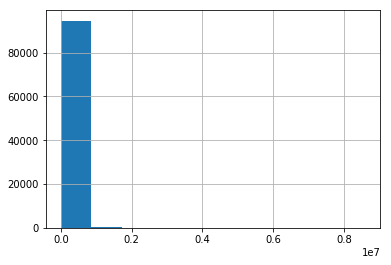

In [41]:
df[ df['state'] == 'successful' ]['converted_pledged_amount'].hist();

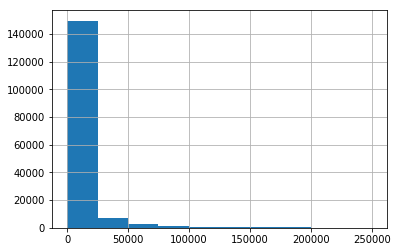

In [42]:
df[ (df['converted_pledged_amount'] < 250000)& (df['converted_pledged_amount'] > 0) ]['converted_pledged_amount'].hist()

The distribution is heavily right-skewed.

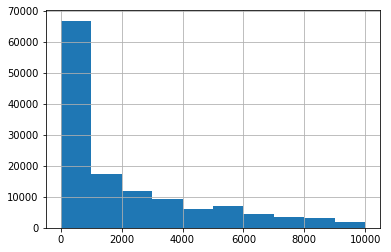

In [43]:
df[ (df['converted_pledged_amount'] < 10000)& (df['converted_pledged_amount'] > 0) ]['converted_pledged_amount'].hist()

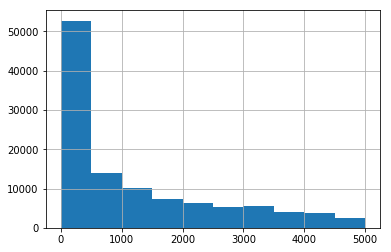

In [44]:
df[ (df['converted_pledged_amount'] < 5000)& (df['converted_pledged_amount'] > 0) ]['converted_pledged_amount'].hist()

In [45]:
df[ df['state'] == 'successful' ]['usd_pledged'].mode()

0    1000.0
dtype: float64

### How many campaigns were created by the same user?

In [46]:
df['creator_id'].nunique()

157326

In [47]:
top_creators = df['creator_id'].value_counts(ascending=False)[:10]
top_creators.index

Int64Index([2104052526,  957058942,  978911160, 2039317553, 1323060510,
            1655558466,  578114575,  863477191,   63602967, 1229765692],
           dtype='int64')

In [48]:
criteria1 = [2104052526,  957058942,  978911160, 2039317553, 1323060510,
            1655558466,  578114575,  863477191,   63602967, 1229765692]

In [49]:
top_creators_df = df[ df['creator_id'].isin(criteria1) ]

In [50]:
top_creators_df['converted_pledged_amount'].mean()

2949.521739130435

In [51]:
top_creators_df['state'].value_counts(normalize=True)

successful    0.942029
failed        0.041063
canceled      0.012077
live          0.004831
Name: state, dtype: float64

### What is the distribution of backers for successful campaigns?

In [52]:
df['backers_count'].describe()

count    182264.000000
mean        133.208198
std         875.850024
min           0.000000
25%           3.000000
50%          22.000000
75%          79.000000
max      105857.000000
Name: backers_count, dtype: float64

In [53]:
df['backers_count'].isnull().sum()

0

### Convert state column to binary for ttest

In [143]:
df['bin_state'] = df['state']
df['bin_state'] = df['bin_state'].replace({
    'successful': 1,
    'live': np.nan,
    'failed': 0,
    'suspended': 0,
    'canceled': 0
})

In [144]:
df['bin_state'].value_counts()

1.0    94778
0.0    83447
Name: bin_state, dtype: int64

In [145]:
successful = df[ df['state'] == 'successful']
successful.shape

(94778, 52)

In [146]:
successful['backers_count'].describe()

count     94778.000000
mean        240.089757
std        1184.704028
min           1.000000
25%          31.000000
50%          68.000000
75%         158.000000
max      105857.000000
Name: backers_count, dtype: float64

In [147]:
successful['backers_count'].mode()

0    19
dtype: int64

In [148]:
# Same as 50 percentile returned by describe
successful['backers_count'].median()

68.0

In [149]:
successful.head()

,backers_count,blurb,converted_pledged_amount,country,created_at,currency,currency_symbol,currency_trailing_code,current_currency,deadline,disable_communication,fx_rate,goal,id,is_starrable,launched_at,name,pledged,slug,source_url,spotlight,staff_pick,state,state_changed_at,static_usd_rate,usd_pledged,usd_type,cat_id,cat_name,cat_slug,cat_position,cat_parent_id,cat_color,loc_id,loc_name,loc_slug,loc_short_name,loc_display_name,loc_local_name,loc_country,loc_state,loc_type,loc_is_root,creator_id,creator_name,creator_slug,profile_id,project_id,url,created_year,bin_state,campaign_length
0,21,2006 was almost 7 years ago.... Can you believ...,802,US,2013-12-21 21:01:30,USD,$,True,USD,2014-02-08 22:37:26,False,1.000000,200.0,287514992,False,2013-12-25 22:37:26,New Final Round Album,802.0,new-final-round-album,https://www.kickstarter.com/discover/categorie...,True,False,successful,1391899046,1.000000,802.000000,international,43,Rock,music/rock,17,14.0,10878931,2379574.0,Chicago,chicago-il,Chicago,Chicago,Chicago,US,IL,Town,False,1495925645,Daniel,NaN,822687,822687,https://www.kickstarter.com/projects/149592564...,2013,1.0,45 days 00:00:00
1,97,An adorable fantasy enamel pin series of princ...,2259,US,2019-02-08 21:02:48,USD,$,True,USD,2019-03-05 16:00:11,False,1.000000,400.0,385129759,False,2019-02-13 16:00:11,Princess Pals Enamel Pin Series,2259.0,princess-pals-enamel-pin-series,https://www.kickstarter.com/discover/categorie...,True,False,successful,1551801611,1.000000,2259.000000,international,54,Mixed Media,art/mixed media,6,1.0,16760235,2486340.0,Sacramento,sacramento-ca,Sacramento,Sacramento,Sacramento,US,CA,Town,False,1175589980,Katherine,freckleddisney,3665299,3665299,https://www.kickstarter.com/projects/freckledd...,2019,1.0,20 days 00:00:00
2,88,Helping a community come together to set the s...,29638,US,2016-10-23 17:06:24,USD,$,True,USD,2016-12-01 15:58:50,False,1.000000,27224.0,681033598,False,2016-11-01 14:58:50,Their Life Through Their Lens-the Amish and Me...,29638.0,their-life-through-their-lens-the-amish-and-me...,https://www.kickstarter.com/discover/categorie...,True,True,successful,1480607932,1.000000,29638.000000,international,280,Photobooks,photography/photobooks,5,15.0,58341,2383660.0,Columbus,columbus-oh,Columbus,Columbus,Columbus,US,OH,Town,False,1196856269,MelissaThomas,NaN,2730508,2730508,https://www.kickstarter.com/projects/119685626...,2016,1.0,30 days 01:00:00
3,193,Every revolution starts from the bottom and we...,49158,IT,2018-10-24 08:32:00,EUR,€,False,USD,2018-12-08 22:59:00,False,1.128433,40000.0,1031782682,False,2018-10-27 23:56:22,WAO: THE ECO EFFECT SHOES,43180.0,wao-the-eco-effect-shoes,https://www.kickstarter.com/discover/categorie...,True,False,successful,1544309940,1.136525,49075.152523,international,266,Footwear,fashion/footwear,5,9.0,16752598,725746.0,Venice,venice-venice-veneto,Venice,Venice,Venice,IT,Veneto,Town,False,1569700626,WAO,wearewao,3498742,3498742,https://www.kickstarter.com/projects/wearewao/...,2018,1.0,41 days 23:02:38
5,77,'Eclipse' - A 30mm hard enamel pin in jet blac...,2117,GB,2018-01-11 16:26:03,GBP,£,False,USD,2018-02-17 11:01:13,False,1.308394,400.0,1140013344,False,2018-02-02 11:01:13,Saluki Totem Enamel Pin,1509.0,saluki-totem-enamel-pin,https://www.kickstarter.com/discover/categorie...,True,False,successful,1518865273,1.419368,2141.826071,international,262,Accessories,fashion/accessories,1,9.0,16752598,15129.0,Cardigan,cardigan-gb,Cardigan,Cardigan,Cardigan,GB,Wales,Town,False,385711367,Jennifer Hawkyard,jezhawk,3273518,3273518,https://www.kickstarter.com/projects/jezhawk/s...,2018,1.0,15 days 00:00:00


In [150]:
successful['usd_per_pledge'] = ( successful['usd_pledged'] / successful['backers_count'] )

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [151]:
successful['usd_per_pledge'].describe()

count    94778.000000
mean        91.588126
std        135.476773
min          1.000000
25%         39.259931
50%         61.790589
75%        101.421674
max      10000.000000
Name: usd_per_pledge, dtype: float64

In [152]:
# Same as 50 percentile returned by describe
successful['usd_per_pledge'].median()

61.7905887216232

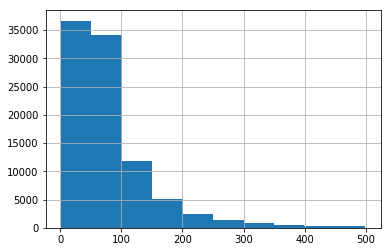

In [153]:
successful[ successful['usd_per_pledge'] < 500 ]['usd_per_pledge'].hist() 

### Is there a correlation with staff pick and fundraising? 

In [154]:
df['staff_pick'].nunique()

2

In [155]:
df['staff_pick'].value_counts()

False    159931
True      22333
Name: staff_pick, dtype: int64

In [156]:
staff_picks = df[ df['staff_pick'] == True ]
no_staff_picks = df[ df['staff_pick'] == False ]

In [157]:
staff_picks['state'].value_counts(normalize=True)

successful    0.868849
failed        0.100837
live          0.017194
canceled      0.013120
Name: state, dtype: float64

### What percent of live campaigns are staff picks?

In [158]:
pd.crosstab(df['staff_pick'], df['state'])

state,canceled,failed,live,successful,suspended
staff_pick,,,,,
False,8331,71948,3655,75374,623
True,293,2252,384,19404,0


In [159]:
# ~10% of live campaigns are staff picks
384 / (384+3655)

0.09507303788066353

In [160]:
# Staff picks by category
staff_picks['cat_name'].value_counts(ascending=False)[:20]

Video Games         905
Art Books           771
Documentary         769
Graphic Novels      655
Children's Books    535
Narrative Film      504
Comic Books         465
Public Art          453
Hardware            444
Nonfiction          404
Animation           398
Anthologies         386
Photobooks          384
Shorts              357
Fiction             335
Graphic Design      321
Indie Rock          318
Classical Music     317
Apparel             302
Performances        302
Name: cat_name, dtype: int64

In [161]:
# do staff picks raise more money? 
staff_picks['converted_pledged_amount'].mean()

45306.591277481755

In [162]:
#Is the staff pick success rate signficantly different than the population?
stats.ttest_ind(staff_picks['bin_state'], no_staff_picks['bin_state'], nan_policy='omit')

Ttest_indResult(statistic=115.81759332604211, pvalue=0.0)

### How long does the average campaign last?

In [163]:
df.head(2)

,backers_count,blurb,converted_pledged_amount,country,created_at,currency,currency_symbol,currency_trailing_code,current_currency,deadline,disable_communication,fx_rate,goal,id,is_starrable,launched_at,name,pledged,slug,source_url,spotlight,staff_pick,state,state_changed_at,static_usd_rate,usd_pledged,usd_type,cat_id,cat_name,cat_slug,cat_position,cat_parent_id,cat_color,loc_id,loc_name,loc_slug,loc_short_name,loc_display_name,loc_local_name,loc_country,loc_state,loc_type,loc_is_root,creator_id,creator_name,creator_slug,profile_id,project_id,url,created_year,bin_state,campaign_length
0,21,2006 was almost 7 years ago.... Can you believ...,802,US,2013-12-21 21:01:30,USD,$,True,USD,2014-02-08 22:37:26,False,1.0,200.0,287514992,False,2013-12-25 22:37:26,New Final Round Album,802.0,new-final-round-album,https://www.kickstarter.com/discover/categorie...,True,False,successful,1391899046,1.0,802.0,international,43,Rock,music/rock,17,14.0,10878931,2379574.0,Chicago,chicago-il,Chicago,Chicago,Chicago,US,IL,Town,False,1495925645,Daniel,NaN,822687,822687,https://www.kickstarter.com/projects/149592564...,2013,1.0,45 days
1,97,An adorable fantasy enamel pin series of princ...,2259,US,2019-02-08 21:02:48,USD,$,True,USD,2019-03-05 16:00:11,False,1.0,400.0,385129759,False,2019-02-13 16:00:11,Princess Pals Enamel Pin Series,2259.0,princess-pals-enamel-pin-series,https://www.kickstarter.com/discover/categorie...,True,False,successful,1551801611,1.0,2259.0,international,54,Mixed Media,art/mixed media,6,1.0,16760235,2486340.0,Sacramento,sacramento-ca,Sacramento,Sacramento,Sacramento,US,CA,Town,False,1175589980,Katherine,freckleddisney,3665299,3665299,https://www.kickstarter.com/projects/freckledd...,2019,1.0,20 days


In [164]:
df['deadline'] = pd.to_datetime(df['deadline'])
df['launched_at'] = pd.to_datetime(df['launched_at'])

In [165]:
df['campaign_length'] = df['deadline'] - df['launched_at']

In [166]:
df['campaign_length'].describe()

count                     182264
mean     32 days 21:59:30.707682
std      11 days 21:54:05.510816
min              1 days 00:00:00
25%             29 days 23:00:00
50%             30 days 00:00:00
75%             34 days 23:34:25
max             93 days 02:32:04
Name: campaign_length, dtype: object

### Understanding the titles of campaigns

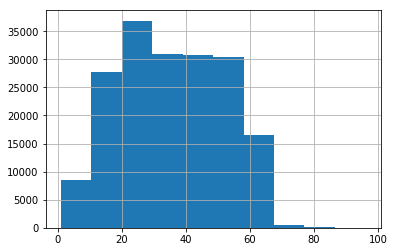

In [167]:
df['name'].apply(len).hist()

In [168]:
df['name'].apply(len).describe()

count    182264.000000
mean         35.207540
std          15.734963
min           1.000000
25%          22.000000
50%          35.000000
75%          49.000000
max          96.000000
Name: name, dtype: float64

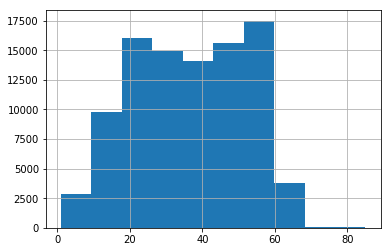

In [169]:
successful['name'].apply(len).hist()

In [170]:
successful['name'].apply(len).describe()

count    94778.000000
mean        36.503313
std         15.407512
min          1.000000
25%         24.000000
50%         37.000000
75%         50.000000
max         85.000000
Name: name, dtype: float64

In [171]:
failed = df[ df['bin_state'] == 0 ]

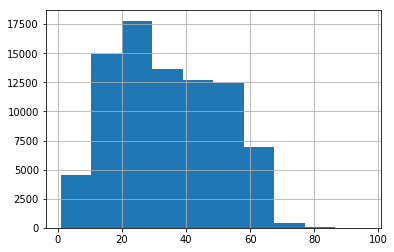

In [172]:
failed['name'].apply(len).hist()

In [173]:
failed['name'].apply(len).describe()

count    83447.000000
mean        33.765132
std         15.982184
min          1.000000
25%         20.000000
50%         32.000000
75%         48.000000
max         96.000000
Name: name, dtype: float64

In [175]:
stats.ttest_ind(successful['name'].apply(len), failed['name'].apply(len), nan_policy='omit')

Ttest_indResult(statistic=36.7885736445984, pvalue=3.6383721417363613e-295)